In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

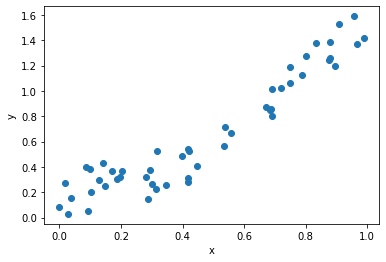

In [3]:
np.random.seed(1) 
X = np.random.rand(50,1) 
y = 0.7*(X**5) -  2.1*(X**4) +  2.3*(X**3) +  0.2*(X**2) +  0.3* X +  0.4*np.random.rand(50,1) # no data in world is perfect 


fig = plt.figure() 
plt.scatter(X, y) 
plt.xlabel("x") 
plt.ylabel("y")
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

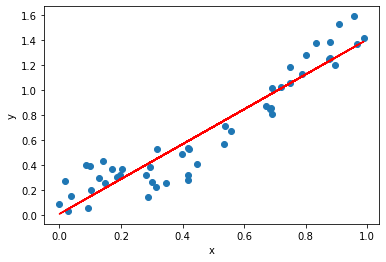

0.8919326382437994


In [10]:
model = LinearRegression().fit(X, y)
outputs = model.predict(X)


fig = plt.figure() 
plt.scatter(X, y) 
plt.plot(X, outputs, color='red')
plt.xlabel("x") 
plt.ylabel("y")
plt.show()
print(model.score(X,y))

In [13]:
X_deg2 = np.hstack([X, X**2])

X_deg2.shape

(50, 2)

In [14]:
X_deg2[:5]

array([[4.17022005e-01, 1.73907352e-01],
       [7.20324493e-01, 5.18867376e-01],
       [1.14374817e-04, 1.30815988e-08],
       [3.02332573e-01, 9.14049845e-02],
       [1.46755891e-01, 2.15372915e-02]])

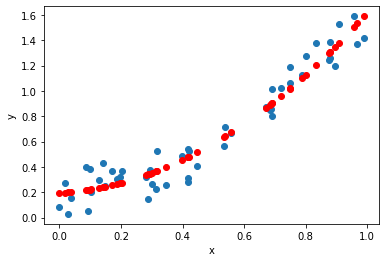

0.937213227713278


In [18]:
model_deg2 = LinearRegression().fit(X_deg2, y)
outputs = model_deg2.predict(X_deg2)


fig = plt.figure() 
plt.scatter(X, y) 
plt.scatter(X, outputs, color='red')
plt.xlabel("x") 
plt.ylabel("y")
plt.show()
print(model_deg2.score(X_deg2,y))

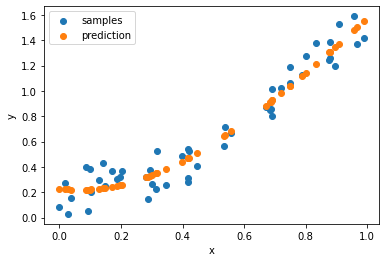

0.9384895307987051


In [19]:
X_deg3 = np.hstack([X, X**2, X**3])
model_deg3 = LinearRegression().fit(X_deg3, y)
output = model_deg3.predict(X_deg3)

fig = plt.figure()
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
print(model_deg3.score(X_deg3, y))

### Sklearn Polynomial Features

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
poly = PolynomialFeatures(5)
X_poly = poly.fit_transform(X)

In [28]:
X.shape

(50, 1)

In [29]:
X_poly.shape

(50, 6)

In [30]:
X_poly[:5]

array([[1.00000000e+00, 4.17022005e-01, 1.73907352e-01, 7.25231927e-02,
        3.02437672e-02, 1.26123164e-02],
       [1.00000000e+00, 7.20324493e-01, 5.18867376e-01, 3.73752880e-01,
        2.69223354e-01, 1.93928176e-01],
       [1.00000000e+00, 1.14374817e-04, 1.30815988e-08, 1.49620548e-12,
        1.71128228e-16, 1.95727599e-20],
       [1.00000000e+00, 3.02332573e-01, 9.14049845e-02, 2.76347041e-02,
        8.35487119e-03, 2.52594970e-03],
       [1.00000000e+00, 1.46755891e-01, 2.15372915e-02, 3.16072440e-03,
        4.63854925e-04, 6.80734427e-05]])

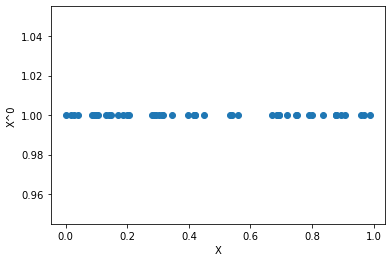

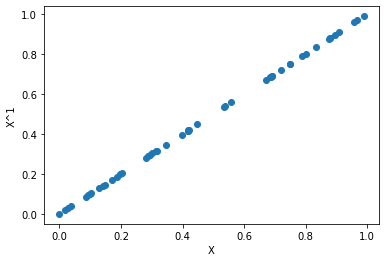

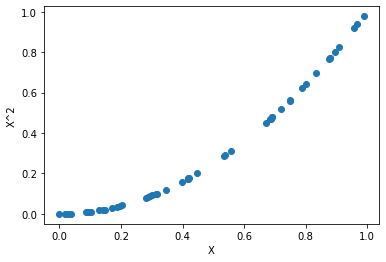

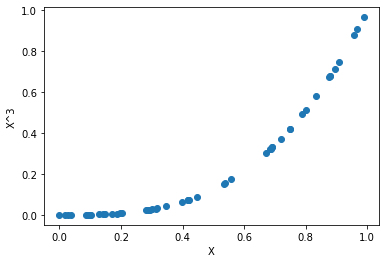

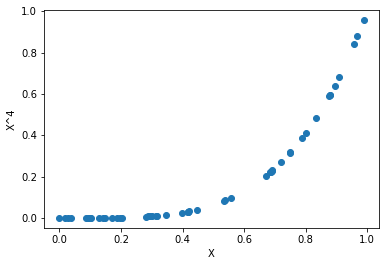

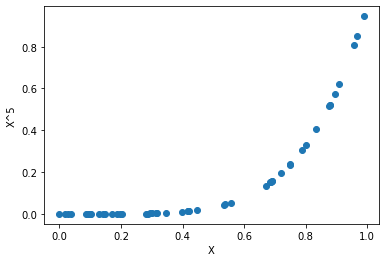

In [31]:
n_features = X_poly.shape[1]

for degree in range(n_features):
    fig = plt.figure()
    plt.scatter(X, X_poly[:,degree])
    plt.xlabel("X")
    plt.ylabel(f"X^{degree}")
    plt.show()

In [33]:
X_poly.shape

(50, 6)

### Sklearn PolynomialFeatures LinearRegression

In [34]:
from sklearn.preprocessing import StandardScaler

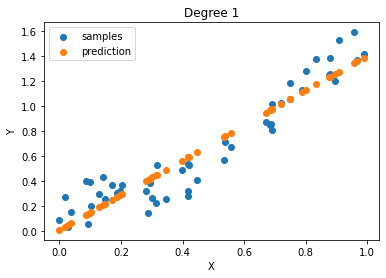

0.8919326382437994


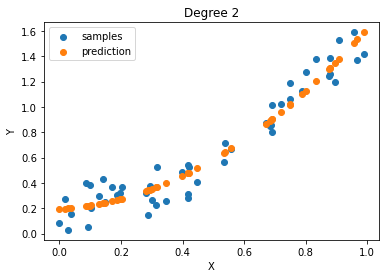

0.937213227713278


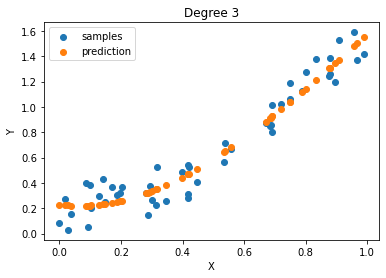

0.9384895307987052


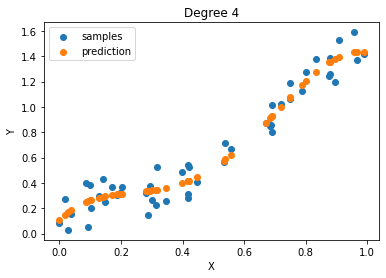

0.9509958355607928


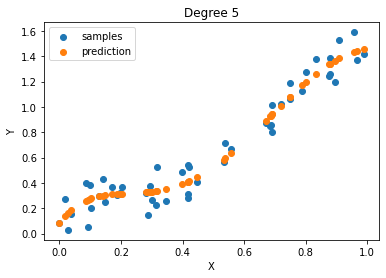

0.9515258649694077


In [36]:
scores = []
for i in range(1, 6):
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)

    # standardisation
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)
    model = LinearRegression()
    model.fit(X_poly_scaled, y)
    output = model.predict(X_poly_scaled)
    
    fig = plt.figure()
    plt.scatter(X, y, label="samples")
    plt.scatter(X, output, label="prediction")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.title(f"Degree {i}")
    plt.show()
    print(model.score(X_poly_scaled, y))
    scores.append(model.score(X_poly_scaled, y))

In [37]:
scores = []
for i in range(1, 50):
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)

    # standardisation
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)
    model = LinearRegression()
    model.fit(X_poly_scaled, y)
    output = model.predict(X_poly_scaled)
    
    
    scores.append(model.score(X_poly_scaled, y))

In [41]:
best_score = np.max(scores)
best_degree = np.argmax(scores) + 1
print(best_degree, best_score)

31 0.9684521019813749


### Train test split. 

In [43]:
np.random.seed(1) 
X = np.random.rand(100,1) 
y = 0.7*(X**5) -  2.1*(X**4) +  2.3*(X**3) +  0.2*(X**2) +  0.3* X +  0.4*np.random.rand(100,1) # no data in world is perfect 



In [44]:
X.shape, y.shape

((100, 1), (100, 1))

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [48]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(80, 1) (80, 1)
(20, 1) (20, 1)


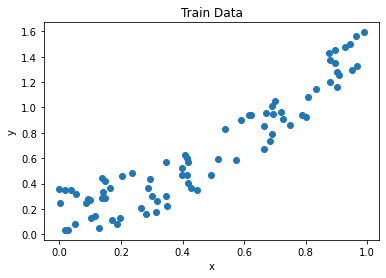

In [50]:
fig = plt.figure() 
plt.scatter(X_train, y_train) 
plt.xlabel("x") 
plt.ylabel("y")
plt.title("Train Data")
plt.show()

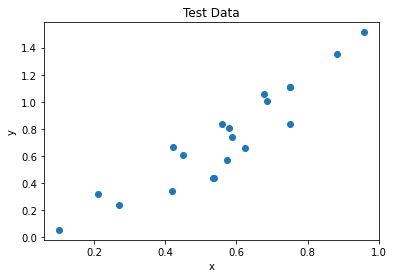

In [49]:
fig = plt.figure() 
plt.scatter(X_test, y_test) 
plt.xlabel("x") 
plt.ylabel("y")
plt.title("Test Data")
plt.show()

# Train Model on training set, and Evaluate on Test Data 

In [62]:
train_scores = []
test_scores = []
for i in range(1, 50):
    # creating polynomial features
    poly = PolynomialFeatures(i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.transform(X_test)

    
    # standardisation
    scaler = StandardScaler().fit(X_train_poly)
    X_train_poly_scaled = scaler.transform(X_train_poly)
    X_test_poly_scaled = scaler.transform(X_test_poly)
    
    #fitting linear regression
    model = LinearRegression()
    model.fit(X_train_poly_scaled, y_train)
    
    # evaluating on train and test set
    train_scores.append(model.score(X_train_poly_scaled, y_train))
    test_scores.append(model.score(X_test_poly_scaled, y_test))

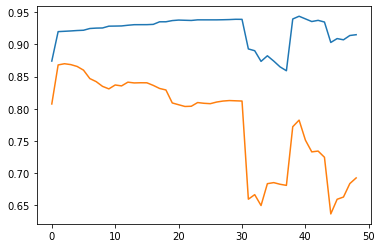

In [64]:
plt.plot(train_scores)
plt.plot(test_scores)

In [67]:
scores = pd.DataFrame({'train': train_scores, 'test' : test_scores})

In [68]:
scores

,train,test
0,0.874021,0.807331
1,0.919770,0.867992
2,0.920299,0.869871
3,0.920833,0.868511
4,0.921496,0.865626
5,0.921924,0.859915
6,0.924631,0.846779
7,0.925243,0.842061
8,0.925462,0.834704
9,0.928259,0.830771
